In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd




/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_2512/3228721421.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_taxi_zones['centroid'] = nyc_taxi_zones.centroid
/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_2512/3228721421.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_taxi_zones['centroid_lon'] = nyc_taxi_zones.centroid.x
/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_2512/3228721421.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_taxi_zones['centroid_lat'] = nyc_taxi_zones.centroid.y


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroid,centroid_lon,centroid_lat
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",POINT (-74.17400 40.69183),-74.174000,40.691831
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",POINT (-73.83130 40.61675),-73.831299,40.616745
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",POINT (-73.84742 40.86447),-73.847422,40.864474
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",POINT (-73.97697 40.72375),-73.976968,40.723752
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562...",POINT (-74.18848 40.55266),-74.188484,40.552659


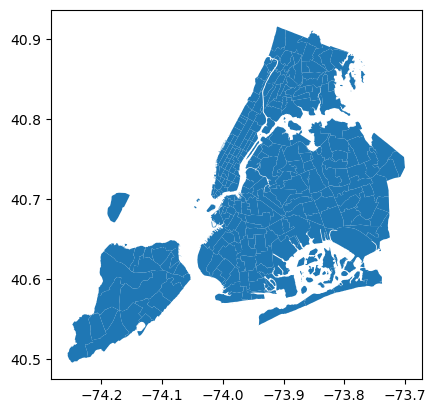

In [5]:
nyc_taxi_zones = gpd.read_file('../data/other/taxi_zones/taxi_zones.shp')
nyc_taxi_zones = nyc_taxi_zones.to_crs(epsg=4326)

# add centre points for each zone
nyc_taxi_zones['centroid'] = nyc_taxi_zones.centroid
nyc_taxi_zones['centroid_lon'] = nyc_taxi_zones.centroid.x
nyc_taxi_zones['centroid_lat'] = nyc_taxi_zones.centroid.y



nyc_taxi_zones.plot()
nyc_taxi_zones.head()


In [ ]:
# 查看所有borough出现的值
nyc_taxi_zones['borough'].unique()

# 绘图时为每个borough设置不同的颜色
nyc_taxi_zones.plot(column='borough', legend=True)

In [ ]:
## 选择流量前50%的区域作为研究区域

# 读取数据
do02 = pd.read_csv('../data/count/q2/step1/do_hvfhv2302.csv')
pu02 = pd.read_csv('../data/count/q2/step1/pu_hvfhv2302.csv')
do03 = pd.read_csv('../data/count/q2/step1/do_hvfhv2303.csv')
pu03 = pd.read_csv('../data/count/q2/step1/pu_hvfhv2303.csv')
do04 = pd.read_csv('../data/count/q2/step1/do_hvfhv2304.csv')
pu04 = pd.read_csv('../data/count/q2/step1/pu_hvfhv2304.csv')



In [ ]:
# 合并数据
## 创建新的dataframe，包含263个区域，将各表对应区域流量数据填入，没有数据的区域填0

volume = pd.DataFrame(columns=['LocationID'])
volume['LocationID'] = nyc_taxi_zones['LocationID']
volume = volume.fillna(0)

# 02
volume = volume.merge(pu02, left_on='LocationID', right_on='pulocationid', how='left')
volume = volume.merge(do02, left_on='LocationID', right_on='dolocationid', how='left')
volume = volume.drop(['pulocationid', 'dolocationid'], axis=1)

# 03
volume = volume.merge(pu03, left_on='LocationID', right_on='pulocationid', how='left')
volume = volume.merge(do03, left_on='LocationID', right_on='dolocationid', how='left')
volume = volume.drop(['pulocationid', 'dolocationid'], axis=1)

# 04
volume = volume.merge(pu04, left_on='LocationID', right_on='pulocationid', how='left')
volume = volume.merge(do04, left_on='LocationID', right_on='dolocationid', how='left')
volume = volume.drop(['pulocationid', 'dolocationid'], axis=1)

volume = volume.fillna(0)

# 更新列名
volume.columns = ['LocationID', 'pu02', 'do02', 'pu03', 'do03', 'pu04', 'do04']

# 计算每个区域的总流量
volume['volume'] = volume['pu02'] + volume['do02'] + volume['pu03'] + volume['do03'] + volume['pu04'] + volume['do04']

# 总流量/2
volume['volume'].sum()/2

# 按照总流量排序
volume = volume.sort_values(by='volume', ascending=False)

# plot the violinplot of the volume
sns.violinplot(x=volume['volume'])

# 在地图上绘制流量前50%的区域
# 提取前50%的区域的LocationID
top50 = volume['LocationID'].head(131)

# 在nyc_taxi_zones中提取前50%的区域
top50_zones = nyc_taxi_zones[nyc_taxi_zones['LocationID'].isin(top50)]

# 绘图
top50_zones.plot(column='borough', legend=True)

# 按流量为每个区域上色
# top50_zones加入volume
top50_zones = top50_zones.merge(volume, on='LocationID', how='left')
top50_zones.plot(column='volume', legend=True)

top50_zones.tail(10)

# 将前50%区域的LocationID保存到csv文件中
top50.to_csv('../data/count/q2/step1/top50_zones.csv', index=False)

In [ ]:
od_fhv2302 = pd.read_csv('../data/count/q2/step2/od_fhv2302.csv')
od_fhv2303 = pd.read_csv('../data/count/q2/step2/od_fhv2303.csv')
od_fhv2304 = pd.read_csv('../data/count/q2/step2/od_fhv2304.csv')
od_hvfhv2302 = pd.read_csv('../data/count/q2/step2/od_hvfhv2302.csv')
od_hvfhv2303 = pd.read_csv('../data/count/q2/step2/od_hvfhv2303.csv')
od_hvfhv2304 = pd.read_csv('../data/count/q2/step2/od_hvfhv2304.csv')

In [ ]:
# 创建用于存放trips的3d array
trips = np.zeros(((28+31+30)*24, 263*263))

# craete a function to fill the trips array

# print summary of the trips array
def print_summary(trips):
    # print percentage of non-zero elements, keep 5 decimal places
    print('percentage of non-zero elements: ', round(np.count_nonzero(trips)/trips.size, 5))
    print('shape: ', trips.shape)
    print('sum: ', trips.sum())
    print('mean: ', trips.mean())
    print('max: ', trips.max())
    print('min: ', trips.min())

def fill_trips(df, trips):
    df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
    df = df[df['pulocationid'] <= 263]
    df = df[df['dolocationid'] <= 263]

    for i, row in df.iterrows():
        try:
            index1 = (row['pickup_hour'].dayofyear - 32) * 24 + row['pickup_hour'].hour
            index2 = (row['pulocationid']-1) * 263 + row['dolocationid']-1
            trips[index1, index2] += row['trips']
        except:
            print('error: ', index1, index2)
            break
    print_summary(trips)
    return trips

trips = fill_trips(od_fhv2302, trips)
trips = fill_trips(od_fhv2303, trips)
trips = fill_trips(od_fhv2304, trips)
trips = fill_trips(od_hvfhv2302, trips)
trips = fill_trips(od_hvfhv2303, trips)
trips = fill_trips(od_hvfhv2304, trips)

np.save('../data/count/q2/step3/tripmatrix.npy', trips, allow_pickle=True, fix_imports=True)
print_summary(trips)
print('Successfully saved to ../data/count/q2/step3/tripmatrix.npy')


In [195]:
## SVD

from numpy.linalg import svd


U, s, Vh = svd(trips, full_matrices=False)

trips1 = s[0] * np.outer(U[:, 0], Vh[0, :])
trips1[trips1 < 0] = 0
trips1 = trips1.astype(int)

trips2 = s[1] * np.outer(U[:, 1], Vh[1, :])
trips2[trips2 < 0] = 0
trips2 = trips2.astype(int)

trips3 = s[2] * np.outer(U[:, 2], Vh[2, :])
trips3[trips3 < 0] = 0
trips3 = trips3.astype(int)

# save the trips
np.save('../data/count/q2/step3/tripmatrix1.npy', trips1, allow_pickle=True, fix_imports=True)
np.save('../data/count/q2/step3/tripmatrix2.npy', trips2, allow_pickle=True, fix_imports=True)
np.save('../data/count/q2/step3/tripmatrix3.npy', trips3, allow_pickle=True, fix_imports=True)


trips_dic = {'0': trips, '1': trips1, '2': trips2, '3': trips3}


In [214]:
reconstructed_matrix = U @ np.diag(s) @ Vh
# 计算重构误差
error = np.linalg.norm(trips - reconstructed_matrix)
print(error)  # 1.4913039959396459e-09

1.4913039959396459e-09


0.8168098190722076


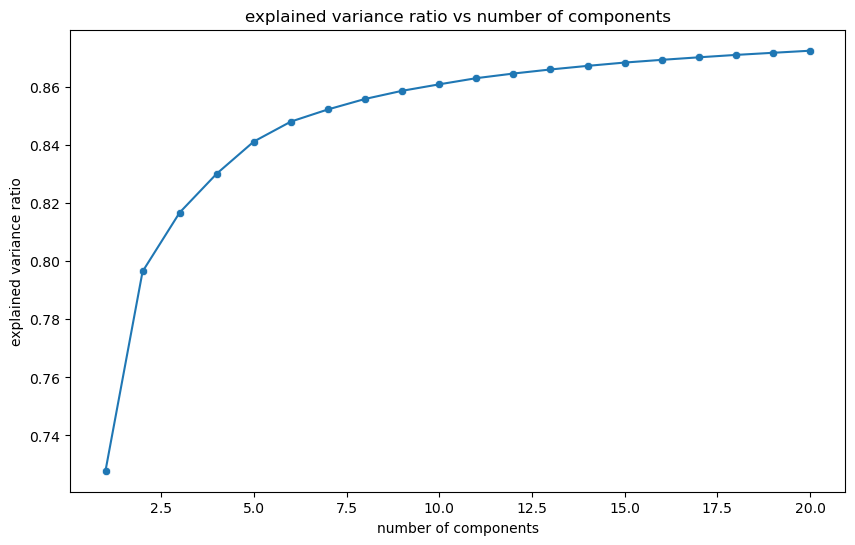

In [235]:
# 计算解释方差
k =3
explained_variance_ratio = np.sum(s[:k]**2) / np.sum(s**2)
print(explained_variance_ratio)


# 绘制美观的折线图前20个奇异值的累计方差 with seaborn
explained_variance_ratio = np.cumsum(s**2) / np.sum(s**2)
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=explained_variance_ratio[:20])
sns.scatterplot(x=range(1, 21), y=explained_variance_ratio[:20])
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
plt.title('explained variance ratio vs number of components')
plt.show()

In [209]:
## 获取时空数据截面并转化成用于绘制OD流向图的dataframe

def get_time_slice(trips_dic, month, o_day, hour, map = nyc_taxi_zones, pattern='0'):
    #get the actual day
    if month == 2:
        if o_day > 28:
            print('error: day should be less than 29')
            return None
        else:
            day = o_day
    elif month == 3:
        if o_day > 31:
            print('error: day should be less than 32')
            return None
        else:
            day = o_day + 28
    elif month == 4:
        if o_day > 30:
            print('error: day should be less than 31')
            return None
        else:
            day = o_day + 28 + 31
    else:
        print('error: month should be 2, 3 or 4')

    # get the trips array
    trips = trips_dic[pattern]

    # get the time slice
    index = (day-1)*24 + hour
    time_slice = trips[index, :]

    print('the actual day is: ',index//24, 'hour: ', index%24)

    # create a dataframe with five columns: sid, eid, trips, slon, slat, elon, elat
    time_slice = pd.DataFrame(time_slice, columns=['trips'])
    time_slice['sid'] = time_slice.index // 263 + 1
    time_slice['eid'] = time_slice.index % 263 + 1

    # add slon, slat, elon, elat
    time_slice = time_slice.merge(nyc_taxi_zones[['LocationID', 'centroid_lon', 'centroid_lat']], left_on='sid', right_on='LocationID', how='left')
    time_slice = time_slice.merge(nyc_taxi_zones[['LocationID', 'centroid_lon', 'centroid_lat']], left_on='eid', right_on='LocationID', how='left')
    time_slice = time_slice.drop(['LocationID_x', 'LocationID_y'], axis=1)
    time_slice.columns = ['count', 'sid', 'eid', 'slon', 'slat', 'elon', 'elat']

    # drop rows with zero trips
    time_slice = time_slice[time_slice['count'] > 0]
    time_slice['count'] = time_slice['count'].astype(int)
    time_slice = time_slice.reset_index(drop=True)

    # drop sid and eid
    time_slice = time_slice.drop(['sid', 'eid'], axis=1)

    # put trips in the last column
    time_slice = time_slice[['slon', 'slat', 'elon', 'elat', 'count']]

    # save to csv
    time_slice.to_csv(f'../data/count/q2/step4/23_{month}_{o_day}-{hour}-pattern{pattern}.csv', index=False)

    return None

# test
time_slice = get_time_slice(trips_dic, 2, 27, 4, pattern='3')




the actual day is:  26 hour:  4


     LocationID  flowrate
109         110  2.225000
198         199  6.400000
206         207  4.240655


/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_2512/3366553435.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, shrink=0.6)


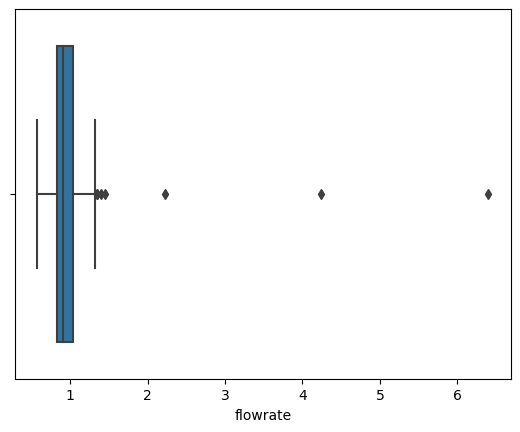

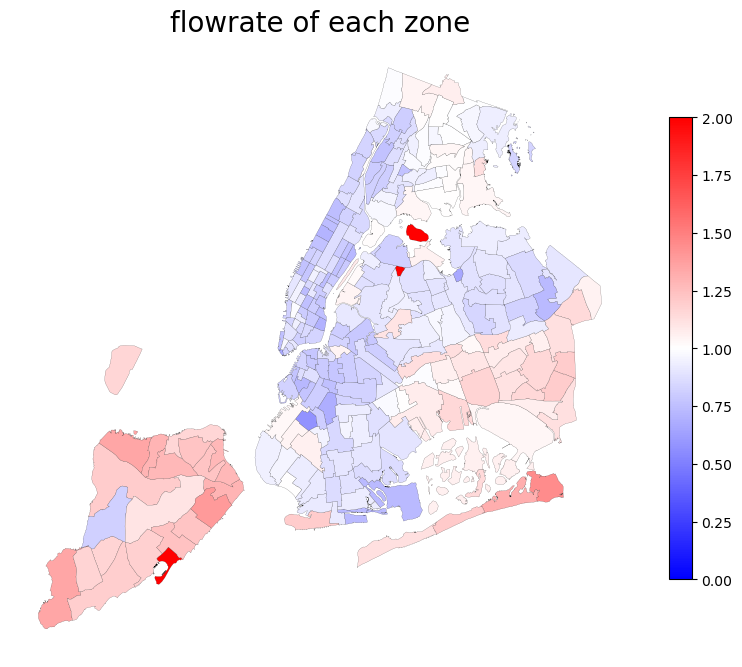

In [36]:
## 读取tripcount.csv

tripcount = pd.read_csv('../data/count/q2/step1/tripcount.csv')


# merge nyc_taxi_zones to tripcount
tripcount = nyc_taxi_zones.merge(tripcount, on='LocationID', how='left')
tripcount.head()

#plot the boxplot of the flowrate, show the location id of the outliers
sns.boxplot(x=tripcount['flowrate'])

# show the outliers
print(tripcount[tripcount['flowrate'] > 2][['LocationID', 'flowrate']])

# drop the outliers of flowrate
# tripcount = tripcount[tripcount['flowrate'] < 2]

import matplotlib.colors as colors

# plot the tripcount,color by flowrate in the map, flowrate >1 is red, flowrate <1 is blue,
# hide the axis
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制地图
cmap = colors.LinearSegmentedColormap.from_list("", ["blue","white","red"])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=2))
tripcount.plot(ax=ax, column='flowrate', cmap=cmap, vmin=0, vmax=2, edgecolor='black', linewidth=0.1)

# 创建颜色条
cbar = fig.colorbar(sm, shrink=0.6)

# 如果你想调整颜色条的位置，你可以使用以下代码：
# cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# fig.colorbar(sm, cax=cax)

ax.axis('off')
ax.set_title('flowrate of each zone', fontsize=20)

for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')

plt.show()






/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_2512/2795320398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tripcount['flowrate'], bins=100, kde=True, rug=True)


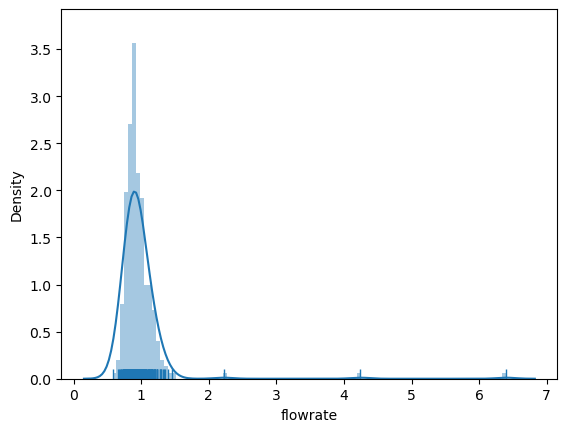

In [37]:
# plot the density of the flowrate, drop the outliers


/var/folders/p7/3vzsfzqd7xg1gkp_lyrvwhhw0000gn/T/ipykernel_2512/2699355630.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tripcount['flowrate'], hist=True, kde=True, bins=100, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})


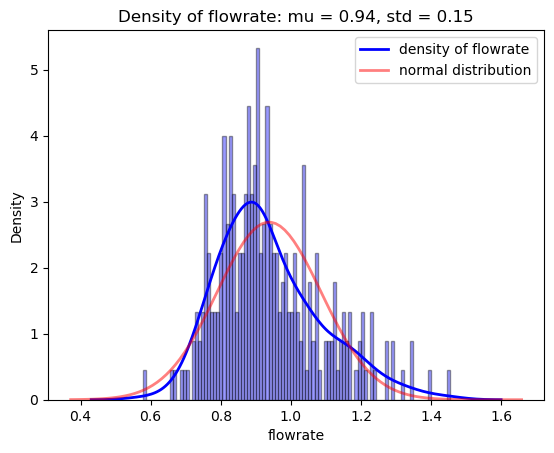

In [48]:
tripcount = tripcount[tripcount['flowrate'] < 2]

# plot the density of the flowrate, compare with the normal distribution
sns.distplot(tripcount['flowrate'], hist=True, kde=True, bins=100, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
# plot the normal distribution
from scipy.stats import norm
mu, std = norm.fit(tripcount['flowrate'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, alpha=0.5)
plt.title('Density of flowrate: mu = %.2f, std = %.2f' % (mu, std))

# add legend
plt.legend([ 'density of flowrate', 'normal distribution'])
plt.show()


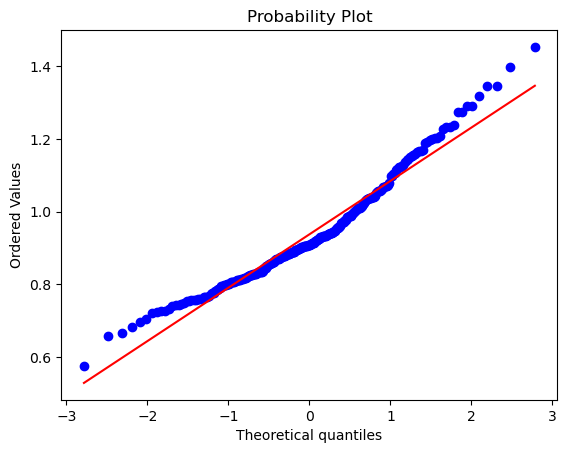

In [49]:
# draw the qqplot of the flowrate
from scipy import stats
stats.probplot(tripcount['flowrate'], plot=plt)
plt.show()


In [50]:
#save the tripcount to csv
tripcount.to_csv('../data/count/q3/flowrate.csv', index=False)

In [51]:
# use scipy.stats.kstest to test if the flowrate is normal distribution
from scipy.stats import kstest
kstest(tripcount['flowrate'], 'norm', args=(mu, std))

KstestResult(statistic=0.10261740604029557, pvalue=0.008262059632909992, statistic_location=0.9465739360011732, statistic_sign=1)